<a href="https://colab.research.google.com/github/Logan-Bogesvang/IS_4487_Tokyo/blob/main/day6_lab_Bogesvang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 6 Lab, IS 4487

The purpose of this lab is to prepare you to complete today's project quiz. Here are the questions you need to be able to answer.

- Understand model accuracy.  Why is it a performance metric for classification and not regression?
- Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable).
- Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
- Explain how the classification tree algorithm chooses which variable to split on and where to split.


## Load Libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

## Get Data


In [2]:
mtc = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")

## Clean the data

Perform the cleaning from the previous labs:
- Remove negative values of income and house
- Remove absurdly large value of handset_price
- Remove NAs
- Make character variables into categorical (AKA factor) variables.


In [4]:
# filter rows
mtc_clean = mtc[(mtc['house'] > 0) & (mtc['income'] > 0) & (mtc['handset_price'] < 1000)]

In [5]:
# remove NAs
mtc_clean = mtc_clean.dropna()

In [6]:
# Convert string to categorical variables (including college)
mtc_clean['reported_satisfaction'] = mtc_clean['reported_satisfaction'].astype('category')
mtc_clean['reported_usage_level'] = mtc_clean['reported_usage_level'].astype('category')
mtc_clean['considering_change_of_plan'] = mtc_clean['considering_change_of_plan'].astype('category')
mtc_clean['college'] = mtc_clean['college'].astype('category')
mtc_clean['leave'] = mtc_clean['leave'].astype('category')

In [7]:
mtc_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,79911.270525,85.114738,24.244694,493946.252903,387.616340,7.739287,5.957549,10032.925110
std,41683.689543,85.610045,26.844259,253599.007645,213.659555,8.802897,4.389439,5815.013219
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41591.500000,0.000000,0.000000,260741.500000,219.000000,1.000000,2.000000,4943.000000
50%,74962.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10124.000000
75%,115497.000000,177.000000,42.000000,701612.250000,528.000000,14.000000,9.000000,15082.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


Looks good.  We will eventually need to encode the categorical variables numerically but for now we will leave them as is.  

## Calculate the proportion of the majority class  
What is the proportion of people who churned?


In [13]:
sum(mtc_clean['leave']=="LEAVE") / len(mtc_clean)

0.4941930316379656

Explanation of code:

- `mtc_clean['leave']`: Selects the `leave` column from the DataFrame
- `mtc_clean['leave']=="LEAVE"`: Creates a boolean mask where True indicates "LEAVE"
- `sum(...)`: Counts the number of True values (i.e., "LEAVE" occurrences)
- `len(mtc_clean)`: Gives the total number of entries in the data
- `/`: Divides the count of "LEAVE" by the total count
- Output: A float between 0 and 1 representing the proportion of customers who left

This means the majority class is 1 - .494 = 50.6% or about 51%.

Why should we care about this proportion?

The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

**Whatever later model we develop should have better accuracy than this performance benchmark.**

## Fit a basic tree model

Use just one variable, `income`. This is a very simple tree we'll call the "money tree."



In [9]:
# Step 1:  Initialize model, specifying
# 1. split criterion is entropy
# 2. max_depth = 2

money_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)

Explanation of code:

- `DecisionTreeClassifier()`: Creates an instance of the decision tree classifier from scikit-learn
- `criterion="entropy"`: Specifies the function to measure the quality of a split (entropy measures the impurity of the split)
- `max_depth=2`: Limits the tree to a maximum depth of 2 levels, controlling complexity and preventing overfitting
- Output: Returns a configured decision tree classifier object, ready to be fitted with data


In [14]:
# Step 2: Create Decision Tree Classifer, specifying
# 1. X (the predictor set) as income
# 2. y (the target) as leave

money_tree = money_tree.fit(X = mtc_clean[['income']],
                            y = mtc_clean['leave'])

Explanation of code:

- `money_tree.fit()`: Trains the decision tree classifier on the provided data
- `X = mtc_clean[['income']]`: Input feature, selecting only the `income` column as a DataFrame
- `y = mtc_clean['leave']`: Target variable, the `leave` column containing the class labels
- Output: Returns the fitted decision tree model, now trained on the income data to predict customer churn


[Text(0.5, 0.8333333333333334, 'income <= 99993.0\nentropy = 1.0\nsamples = 4994\nvalue = [2468, 2526]\nclass = LEAVE'),
 Text(0.25, 0.5, 'income <= 20181.0\nentropy = 0.991\nsamples = 3303\nvalue = [1468, 1835]\nclass = LEAVE'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = LEAVE'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.991\nsamples = 3295\nvalue = [1468, 1827]\nclass = LEAVE'),
 Text(0.75, 0.5, 'income <= 159576.0\nentropy = 0.976\nsamples = 1691\nvalue = [1000, 691]\nclass = STAY'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.977\nsamples = 1680\nvalue = [989, 691]\nclass = STAY'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = STAY')]

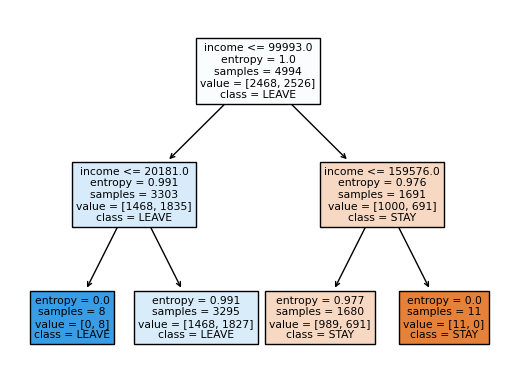

In [11]:
# Step 3: Visualize the money tree model
plot_tree(money_tree,
          feature_names=['income'],
          class_names=['STAY', 'LEAVE'],
          filled=True)

Explanation of code:

- `plot_tree()`: Function from scikit-learn to visualize the decision tree
- `money_tree`: The fitted decision tree model to be visualized
- `feature_names=['income']`: Labels the feature as `income` in the tree diagram
- `class_names=['STAY', 'LEAVE']`: Specifies the names for the target classes in the visualization
- `filled=True`: Colorizes the nodes based on the majority class at each node


This plot is a bit confusing!  Here is an interpretive guide.

1. **Root Node (Top)**:
   - Split: income <= 99993.0
   - Samples: 4994
   - Initial prediction: LEAVE

2. **Second Level**:
   - Left Branch (income <= 20181.0):
     - Samples: 3303
     - Prediction: LEAVE
   - Right Branch (20181.0 < income <= 159576.0):
     - Samples: 1691
     - Prediction: STAY

3. **Third Level (Leaf Nodes)**:
   - Far Left (income <= 20181.0):
     - Samples: 8
     - Prediction: LEAVE (high certainty, entropy = 0.0)
   - Middle Left (20181.0 < income <= 99993.0):
     - Samples: 3295
     - Prediction: LEAVE (with uncertainty, entropy = 0.991)
   - Middle Right (99993.0 < income <= 159576.0):
     - Samples: 1680
     - Prediction: STAY (with uncertainty, entropy = 0.977)
   - Far Right (income > 159576.0):
     - Samples: 11
     - Prediction: STAY (high certainty, entropy = 0.0)



## Check Accuracy

What is the accuracy of the money_tree?


In [15]:
# 1. Generate predictions from the model for the training data
money_tree.predict(X = mtc_clean[['income']])

array(['STAY', 'STAY', 'STAY', ..., 'STAY', 'STAY', 'LEAVE'], dtype=object)

Explanation of code:

- `money_tree.predict()`: Method to make predictions using the trained decision tree model
- `X = mtc_clean[['income']]`: Input data for prediction, using only the `income` column from the DataFrame
- Output: Returns an array of predicted class labels ('STAY' or 'LEAVE') for each row in the input data


In [19]:
# 1. Generate predictions from the model for the training data
pred = money_tree.predict(X = mtc_clean[['income']]) # Assign the result to the variable 'pred'

# 2. Calculate accuracy as the proportion of correct predictions
sum(pred == mtc_clean['leave']) / len(pred)

0.5676812174609531

Explanation of code:

- `pred == mtc_clean['leave']`: Creates a boolean array comparing predictions to actual values
- `sum(...)`: Counts the number of correct predictions (True values in the boolean array)
- `len(pred)`: Gets the total number of predictions made
- `/`: Divides to calculate the proportion of correct predictions
- Output: Returns a float between 0 and 1 representing the accuracy of the model


So, this is better than the accuracy of the majority class classifier, which was our benchmark.  Success!

We can definitely improve on this result by creating a more complicated model. We will do that tomorrow.